In [3]:
from Chapter2.CreateDataset import CreateDataset
from util.VisualizeDataset import VisualizeDataset
from util import util
import copy
import os
import pandas as pd

ImportError: No module named Chapter2.CreateDataset

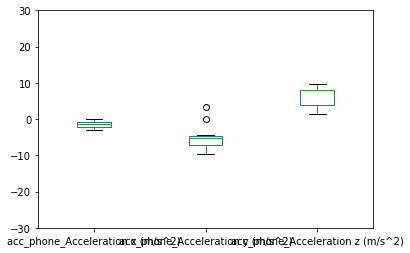

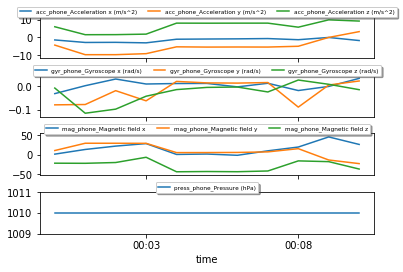

column, fraction missing values, mean, standard deviation, min, max
acc_phone_Acceleration x (m/s^2) 0.0 -1.45351698064 0.988530033807 -2.99318790894 0.0154491687792
acc_phone_Acceleration y (m/s^2) 0.0 -5.0284882728 3.91419342866 -9.60441986187 3.2672952381
acc_phone_Acceleration z (m/s^2) 0.0 6.15746671088 3.1117489203 1.54976473449 9.84270661074
gyr_phone_Gyroscope x (rad/s) 0.0 0.00440291022633 0.0189664567923 -0.0323224679509 0.0324264974359
gyr_phone_Gyroscope y (rad/s) 0.0 -0.0223136177907 0.0457154763507 -0.0896578766295 0.0213938282051
gyr_phone_Gyroscope z (rad/s) 0.0 -0.0272158294813 0.0432524955429 -0.115659468206 0.0254381037761
mag_phone_Magnetic field x 0.0 14.9448787501 14.7395790711 -1.78394732455 45.1963827305
mag_phone_Magnetic field y 0.0 8.93860468443 16.8220627336 -23.067816092 29.0535012594
mag_phone_Magnetic field z 0.0 -28.6693644278 13.5004739441 -43.9386628876 -6.83933988998
press_phone_Pressure (hPa) 0.0 1010.0 0.0 1010.0 1010.0


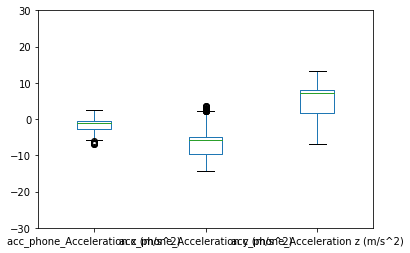

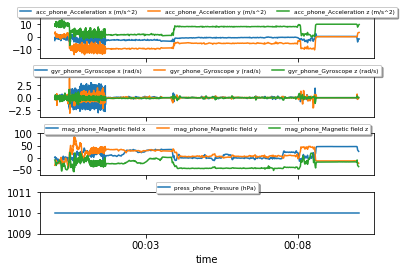

column, fraction missing values, mean, standard deviation, min, max
acc_phone_Acceleration x (m/s^2) 0.624948024948 -1.60593715999 1.52749217857 -6.8464982 2.49753008016
acc_phone_Acceleration y (m/s^2) 0.624948024948 -6.03343461317 4.19549361473 -14.3932 3.6381147541
acc_phone_Acceleration z (m/s^2) 0.624948024948 5.3286004351 3.80859649381 -6.9404 13.3861
gyr_phone_Gyroscope x (rad/s) 0.625363825364 -0.0108702572439 0.867078365182 -2.9803 2.9462
gyr_phone_Gyroscope y (rad/s) 0.625363825364 -0.0473519187732 0.443869739261 -3.0622 3.80599333333
gyr_phone_Gyroscope z (rad/s) 0.625363825364 -0.0363863670075 0.270066164836 -1.3837046 1.61257575758
mag_phone_Magnetic field x 0.625363825364 11.5164440181 17.3697226664 -38.925 46.008
mag_phone_Magnetic field y 0.625363825364 13.6942523025 22.9335750831 -43.135 85.5433333333
mag_phone_Magnetic field z 0.625363825364 -25.7809025836 15.7184864218 -58.2857142857 21.14
press_phone_Pressure (hPa) 0.624948024948 1010.0 0.0 1010.0 1010.0


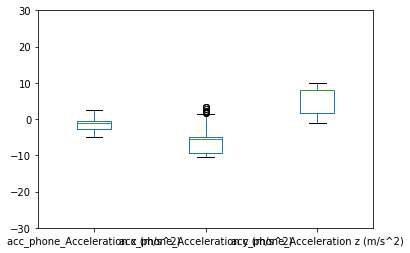

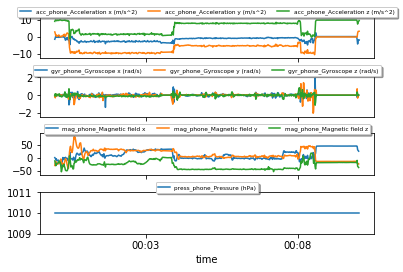

column, fraction missing values, mean, standard deviation, min, max
acc_phone_Acceleration x (m/s^2) 0.0 -1.43021507415 1.22269510368 -4.82562 2.49753008016
acc_phone_Acceleration y (m/s^2) 0.0 -5.82661361011 3.56469744168 -10.57416 3.32692307692
acc_phone_Acceleration z (m/s^2) 0.0 5.8695919963 3.49214839596 -1.12001962 10.0613626834
gyr_phone_Gyroscope x (rad/s) 0.00166112956811 0.000614735546122 0.182006083043 -1.37297087273 1.887892
gyr_phone_Gyroscope y (rad/s) 0.00166112956811 -0.0265627562459 0.219632695242 -2.03144922 1.4080848
gyr_phone_Gyroscope z (rad/s) 0.00166112956811 -0.0285302030882 0.144311799109 -1.12769134 0.845763527054
mag_phone_Magnetic field x 0.00166112956811 13.8543446328 18.0874689673 -31.796 46.008
mag_phone_Magnetic field y 0.00166112956811 12.0752497608 19.2238840331 -40.468 80.951
mag_phone_Magnetic field z 0.00166112956811 -27.8644328482 15.4649770465 -53.363 18.652
press_phone_Pressure (hPa) 0.0 1010.0 0.0 1010.0 1010.0


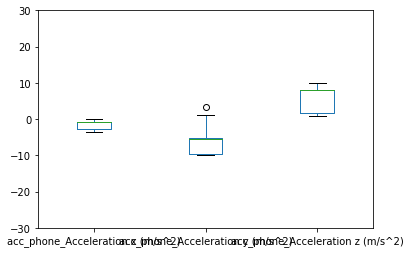

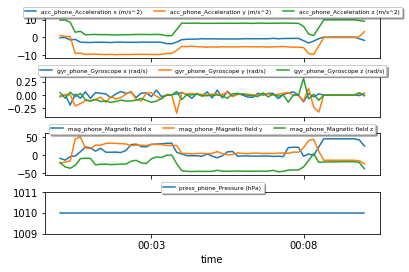

column, fraction missing values, mean, standard deviation, min, max
acc_phone_Acceleration x (m/s^2) 0.0 -1.43271551492 1.12606065172 -3.62317453963 0.163642785671
acc_phone_Acceleration y (m/s^2) 0.0 -5.70798979008 3.61709419759 -9.7539396217 3.2672952381
acc_phone_Acceleration z (m/s^2) 0.0 5.91161253005 3.37701154022 0.959562277366 9.9106285028
gyr_phone_Gyroscope x (rad/s) 0.0 0.00206988580577 0.0497156487311 -0.190100320592 0.0929753282626
gyr_phone_Gyroscope y (rad/s) 0.0 -0.025848669448 0.0857733397548 -0.345679746048 0.126411391635
gyr_phone_Gyroscope z (rad/s) 0.0 -0.0281932198331 0.0716629797144 -0.140673498533 0.315665984187
mag_phone_Magnetic field x 0.0 14.0361698198 17.3537424927 -13.2103517588 45.8154
mag_phone_Magnetic field y 0.0 11.5618817455 18.4520804355 -23.067816092 50.931
mag_phone_Magnetic field z 0.0 -27.9926302038 14.5675618548 -45.2896 4.8976976977
press_phone_Pressure (hPa) 0.0 1010.0 0.0 1010.0 1010.0
made it here yo
attribute, fraction missing values, mean

In [7]:
dataset_path = '../datasets/phyphox_erik/Updated/'
result_dataset_path = './intermediate_datafiles/'

if not os.path.exists(result_dataset_path):
    print('Creating result directory: ' + result_dataset_path)
    os.makedirs(result_dataset_path)

# Chapter 2: Initial exploration of the dataset.

# Set a granularity (i.e. how big are our discrete time steps). We start very
# coarse grained, namely one measurement per minute, and secondly use four measurements
# per second

granularities = [60000, 250, 1000,10000]
datasets = []

for milliseconds_per_instance in granularities:

    # Create an initial dataset object with the base directory for our data and a granularity
    DataSet = CreateDataset(dataset_path, milliseconds_per_instance)

    # Add the selected measurements to it.

    # We add the accelerometer data (continuous numerical measurements) of the phone and the smartwatch
    # and aggregate the values per timestep by averaging the values/
    DataSet.add_numerical_dataset('Accelerometer.csv', 'Time (s)', ['Acceleration x (m/s^2)',
                                                                      'Acceleration y (m/s^2)',
                                                                      'Acceleration z (m/s^2)'], 'avg', 'acc_phone_')
#     DataSet.add_numerical_dataset('accelerometer_smartwatch.csv', 'timestamps', ['x','y','z'], 'avg', 'acc_watch_')

    # We add the gyroscope data (continuous numerical measurements) of the phone and the smartwatch
    # and aggregate the values per timestep by averaging the values/
    DataSet.add_numerical_dataset('Gyroscope.csv', 'Time (s)', ['Gyroscope x (rad/s)',
                                                                'Gyroscope y (rad/s)',
                                                                'Gyroscope z (rad/s)'], 'avg', 'gyr_phone_')
#     DataSet.add_numerical_dataset('gyroscope_smartwatch.csv', 'timestamps', ['x','y','z'], 'avg', 'gyr_watch_')

    # We add the heart rate (continuous numerical measurements) and aggregate by averaging again
    # DataSet.add_numerical_dataset('heart_rate_smartwatch.csv', 'timestamps', ['rate'], 'avg', 'hr_watch_')

    # We add the labels provided by the users. These are categorical events that might overlap. We add them
    # as binary attributes (i.e. add a one to the attribute representing the specific value for the label if it
    # occurs within an interval).
    # DataSet.add_event_dataset('labels.csv', 'label_start', 'label_end', 'label', 'binary')

    # We add the amount of light sensed by the phone (continuous numerical measurements) and aggregate by averaging again
    #DataSet.add_numerical_dataset('light_phone.csv', 'timestamps', ['lux'], 'avg', 'light_phone_')

    # We add the magnetometer data (continuous numerical measurements) of the phone and the smartwatch
    # and aggregate the values per timestep by averaging the values
    DataSet.add_numerical_dataset('Magnetometer.csv', 'Time (s)', ['Magnetic field x',
                                                                   'Magnetic field y',
                                                                   'Magnetic field z'], 'avg', 'mag_phone_')
#     DataSet.add_numerical_dataset('magnetometer_smartwatch.csv', 'timestamps', ['x','y','z'], 'avg', 'mag_watch_')

    # We add the pressure sensed by the phone (continuous numerical measurements) and aggregate by averaging again
    DataSet.add_numerical_dataset('Pressure.csv', 'Time (s)', ['Pressure (hPa)'], 'avg', 'press_phone_')

    # Get the resulting pandas data table

    dataset = DataSet.data_table

    # Plot the data

    DataViz = VisualizeDataset()

    # Boxplot
    DataViz.plot_dataset_boxplot(dataset, ['acc_phone_Acceleration x (m/s^2)','acc_phone_Acceleration y (m/s^2)',
                                           'acc_phone_Acceleration z (m/s^2)'])

    # Plot all data
    DataViz.plot_dataset(dataset, ['acc_', 'gyr_', 'mag_', 'press_phone_'], ['like', 'like', 'like', 'like','like'], ['line', 'line', 'line', 'line','points'])

    # And print a summary of the dataset

    util.print_statistics(dataset)
    datasets.append(copy.deepcopy(dataset))

# And print the table that has been included in the book
print('made it here yo')
util.print_latex_table_statistics_two_datasets(datasets[0], datasets[1])

# Finally, store the last dataset we have generated (250 ms).
dataset.to_csv(result_dataset_path + 'chapter2_result_notebook.csv')


# Activity description

first 30s: walking stairs
30s-90s: walking
2m-4m: standing still
4m - 8m: biking
8-10m: placing phone on fridge, leaving on fridge
